# Ejercicio PCA_LDA

In [86]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [87]:
# Cargar el dataset
df = pd.read_csv('./Data/breast-cancer.csv')
df.shape

(569, 32)

In [88]:
# Revisión inicial del dataset
pd.options.display.max_columns = None
df.head()

,id,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


# Análisis y modificación de los datos

In [89]:
# Dimensiones del dataset
print("Dimensiones del dataset (filas, columnas):")
print(df.shape)

Dimensiones del dataset (filas, columnas):
(569, 32)


In [90]:
# Estadísticas descriptivas de las columnas numéricas
print("Estadísticas descriptivas:")
df.describe()

Estadísticas descriptivas:


,id,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [91]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
id                    0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
diagnosis             0
dtype: int64


In [92]:
# Eliminar la columna 'id'
df.drop('id', axis=1, inplace=True)
print("Columnas después de eliminar 'id':")
print(df.columns)

Columnas después de eliminar 'id':
Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'diagnosis'],
      dtype='object')


In [93]:
# Codificar la columna 'diagnosis'
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("Valores únicos en 'diagnosis' después de codificación:")
print(df['diagnosis'].unique())

Valores únicos en 'diagnosis' después de codificación:
[1 0]


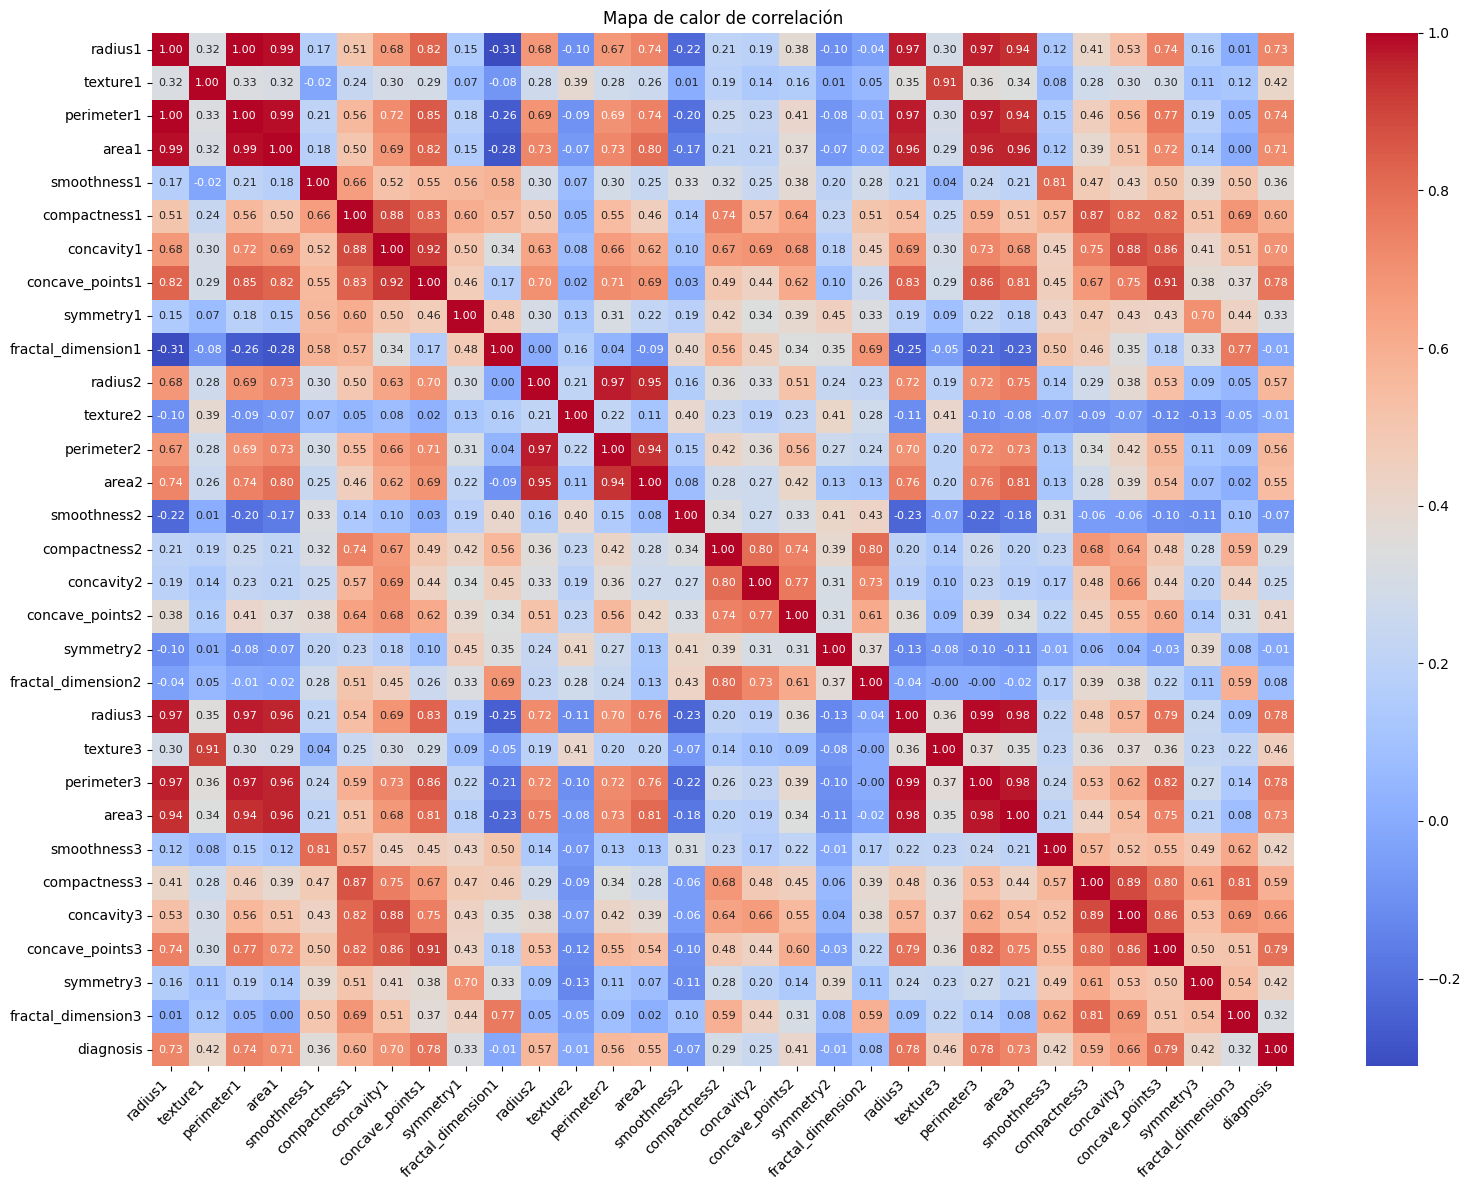

In [94]:
# Crear un mapa de calor de la correlación para identificar relaciones entre las variables
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(
    correlation_matrix, 
    cmap='coolwarm', 
    annot=True, 
    fmt=".2f", 
    annot_kws={"size": 8}
)
plt.title("Mapa de calor de correlación")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

# Estándarización de datos después de dividir entrenamiento y pruebas
Para la estandarización, primero dividimos los datos en un conjunto de entrenamiento y otro de prueba. Posteriormente, aplicamos la normalización utilizando StandardScaler.

In [95]:
# Dividir los datos en entrenamiento y prueba
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Dividimos los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Estandarizar los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Revisamos el tamaño de los datos después de la estandarización
print("Dimensiones de X_train después de estandarización:", X_train_scaled.shape)
print("Dimensiones de X_test después de estandarización:", X_test_scaled.shape)

Dimensiones de X_train después de estandarización: (455, 30)
Dimensiones de X_test después de estandarización: (114, 30)


# Elegir el número de dimensiones a reducir

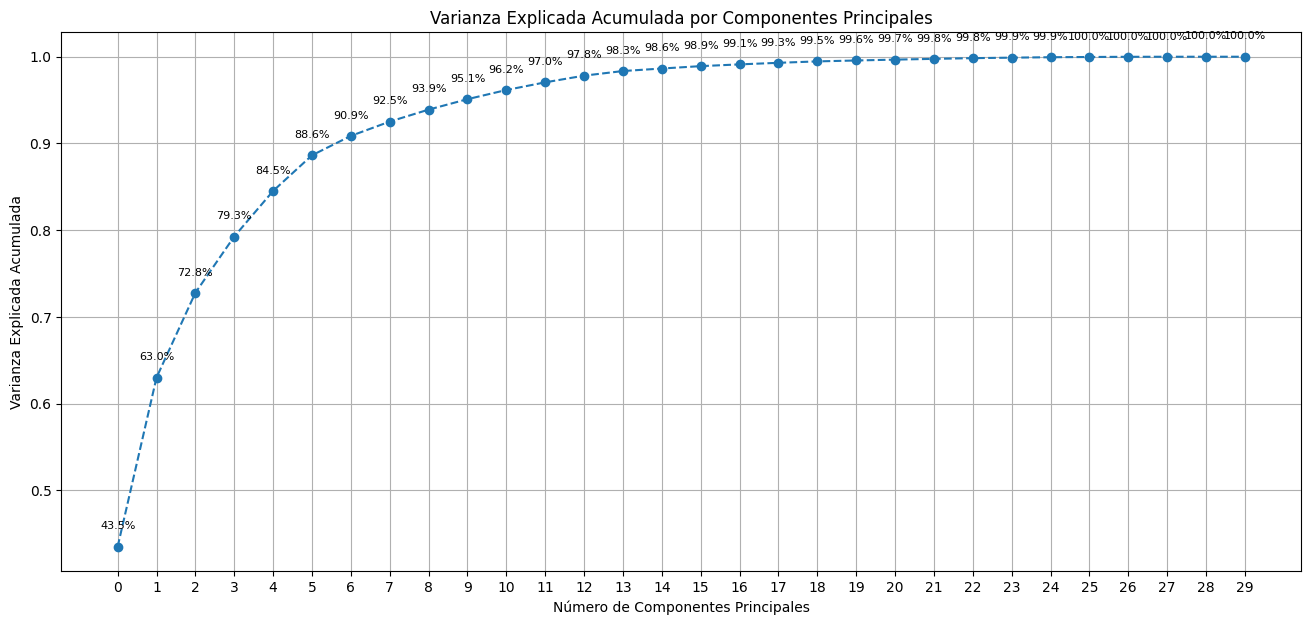

In [97]:
# Aplicar PCA al conjunto de entrenamiento estandarizado
pca = PCA()  # Sin especificar el número de componentes, ajustamos el PCA a todas las dimensiones
pca.fit(X_train_scaled)

# Veamos cuán buenos predictores son las nuevas dimensiones
expl = pca.explained_variance_ratio_

# Graficar la varianza explicada acumulada
plt.figure(figsize=(16, 7))
varianza_acumulada = np.cumsum(expl)  # Cálculo de la varianza acumulada
plt.plot(varianza_acumulada, marker='o', linestyle='--', label='Varianza Explicada Acumulada')

# Agregar etiquetas a cada punto con el porcentaje correspondiente
for i, v in enumerate(varianza_acumulada):
    plt.text(i, v + 0.02, f"{v*100:.1f}%", ha='center', fontsize=8)

# Configuración del gráfico
plt.xticks(np.arange(len(varianza_acumulada)))
plt.title("Varianza Explicada Acumulada por Componentes Principales")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.grid(True)
plt.show()

Con 5 componentes principales, se explica más del 85% de la varianza total, lo que garantiza una representación significativa de los datos, manteniendo una reducción dimensional eficiente sin sacrificar demasiada información.

# PCA

In [98]:
# Reducir las dimensiones con PCA
pca_reducido = PCA(n_components=5)
X_train_pca = pca_reducido.fit_transform(X_train_scaled)
X_test_pca = pca_reducido.transform(X_test_scaled)

# Verificar las nuevas dimensiones
print("Dimensiones de X_train después de PCA:", X_train_pca.shape)
print("Dimensiones de X_test después de PCA:", X_test_pca.shape)

Dimensiones de X_train después de PCA: (455, 5)
Dimensiones de X_test después de PCA: (114, 5)


In [99]:
# Veamos cuán buenos predictores son las nuevas dimensiones
expl = pca_reducido.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", expl)
print("Suma de los primeros 5 componentes:", sum(expl[:5]))

Varianza explicada por cada componente principal: [0.43502782 0.19500007 0.09781519 0.06486409 0.05253378]
Suma de los primeros 5 componentes: 0.8452409438260114


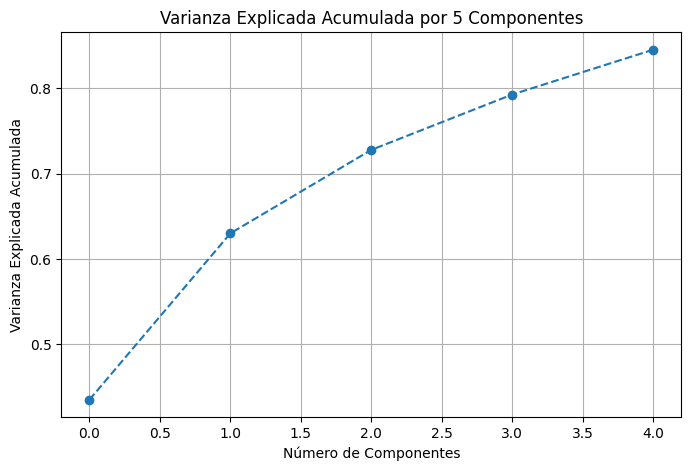

In [100]:
# Visualización: Varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_reducido.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por 5 Componentes')
plt.grid()
plt.show()

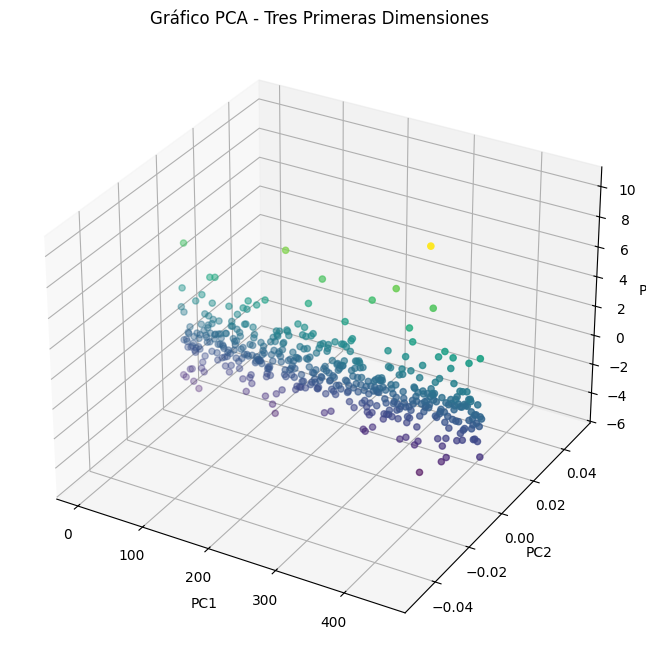

In [101]:
# Extraer los tres primeros componentes principales
Xax = X_train_pca[:, 0]
Yax = X_train_pca[:, 1]
Zax = X_train_pca[:, 2]

# Crear una figura y un eje tridimensional
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(range(len(Xax)), np.zeros_like(Xax), Zax, c=Zax, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Gráfico PCA - Tres Primeras Dimensiones')
plt.show()

Este gráfico sugiere que las primeras dos dimensiones (PC1 y PC2) podrían capturar la mayor parte de la información y la variabilidad en los datos. PC3 parece ser menos importante, ya que los puntos no se dispersan demasiado en esa dimensión.

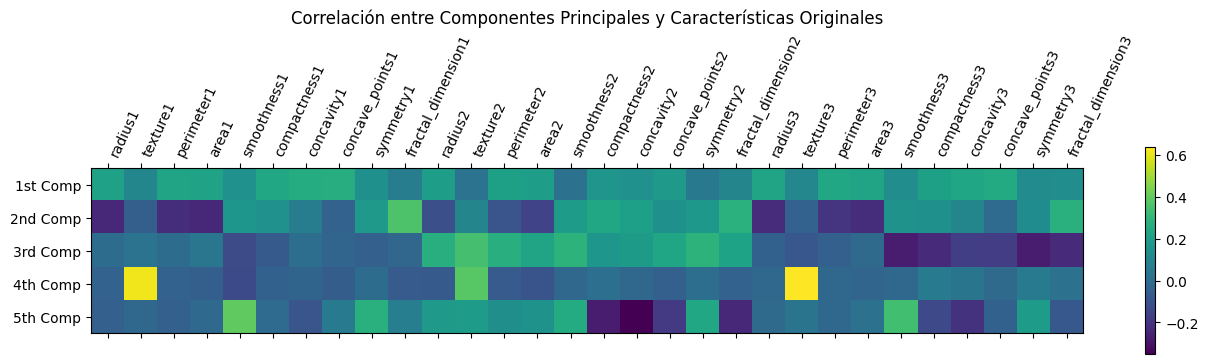

In [102]:
# Graficar la correlación entre las nuevas componentes y las dimensiones originales
plt.matshow(pca_reducido.components_[:5], cmap='viridis')
plt.yticks([0, 1, 2, 3, 4], ['1st Comp', '2nd Comp', '3rd Comp', '4th Comp', '5th Comp'], fontsize=10)
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, rotation=65, ha='left')
plt.subplots_adjust(bottom=0.2, left=0.1, right=0.9, top=0.9)
plt.title("Correlación entre Componentes Principales y Características Originales")
plt.show()

- 1st Comp: Correlacionada principalmente con características de tamaño y forma, como radius1 y perimeter1. Captura la variabilidad relacionada con el tamaño de las muestras.
- 2nd Comp: Relacionada con las características de textura (texture1, texture2). Refleja variabilidad en la textura de las muestras.
- 3rd Comp: Fuerte correlación con características geométricas, como radius2 y perimeter2. Refleja variabilidad en las dimensiones y suavidad de las muestras.
- 4th Comp: Correlaciones más dispersas, especialmente con texture2. Puede capturar variabilidad en la forma más compleja de las muestras.
- 5th Comp: Correlacionada principalmente con radius3, pero también muestra correlaciones negativas con algunas otras características, lo que sugiere que captura patrones complejos en los datos.

In [103]:
components = pd.DataFrame(pca_reducido.components_, columns = X.columns)
components

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,0.216015,0.101700,0.225181,0.218535,0.148982,0.240836,0.259500,0.263324,0.146217,0.065741,0.203919,0.023454,0.209024,0.199503,0.021572,0.165763,0.149054,0.182430,0.047664,0.098753,0.226392,0.105123,0.236126,0.224216,0.132348,0.211297,0.229556,0.252917,0.127241,0.132341
1,-0.240040,-0.051263,-0.222161,-0.236489,0.169316,0.150134,0.064037,-0.039640,0.183280,0.361447,-0.108859,0.096951,-0.091604,-0.153646,0.194466,0.237907,0.207842,0.143048,0.174509,0.281102,-0.224548,-0.038994,-0.203586,-0.222669,0.156182,0.144035,0.102781,-0.005671,0.130100,0.277354
2,-0.001423,0.025268,-0.002585,0.036273,-0.122016,-0.071950,0.006448,-0.028521,-0.048728,-0.026185,0.274034,0.346417,0.270326,0.224801,0.286597,0.166428,0.189180,0.229924,0.286371,0.221846,-0.044549,-0.081846,-0.046794,-0.009070,-0.275650,-0.231893,-0.166863,-0.172119,-0.273768,-0.229133
3,-0.039279,0.617270,-0.040768,-0.050586,-0.129085,-0.045088,-0.034479,-0.059792,-0.002021,-0.066712,-0.072788,0.381447,-0.066418,-0.093013,-0.019942,0.010474,-0.020422,-0.048392,0.005529,-0.038969,-0.017287,0.637622,-0.016387,-0.029536,-0.019139,0.054834,0.033231,-0.008006,0.059617,0.022879
4,-0.048109,-0.015640,-0.047323,-0.015324,0.396840,-0.005108,-0.089789,0.051237,0.275207,0.071305,0.178180,0.189417,0.139855,0.155829,0.256820,-0.273717,-0.351881,-0.184393,0.236687,-0.239898,-0.009688,0.027863,-0.022880,0.017233,0.337568,-0.133858,-0.208791,-0.045231,0.191848,-0.078761


Estos valores son las cargas que indican cómo cada característica original contribuye a los componentes principales

# Empezar a entrenar un clasificador binario

In [104]:
# Crear y entrenar el modelo de regresión logística
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_pca, y_train)

# Predecir en el conjunto de prueba
y_pred = classifier.predict(X_test_pca)

Matriz de confusión:
[[70  1]
 [ 1 42]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Exactitud del modelo: 98.25%
ROC-AUC: 1.00


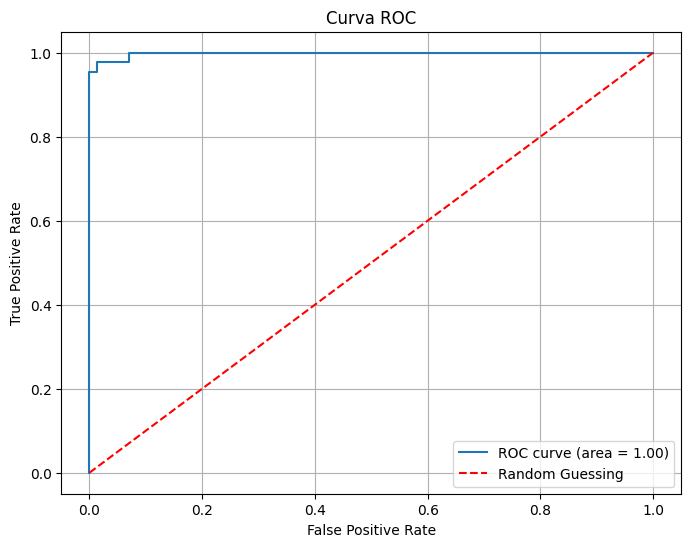

In [105]:
# Evaluar el modelo
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud del modelo: {accuracy * 100:.2f}%")

# ROC-AUC
y_pred_proba = classifier.predict_proba(X_test_pca)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

> + ROC (Receiver Operating Characteristic): Gráfica que muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a diferentes umbrales de decisión.

> + AUC (Area Under the Curve): Representa el área bajo la curva ROC. Valores cercanos a 1 indican un modelo excelente, mientras que 0.5 indica un modelo que predice al azar.

# LDA

In [106]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

In [107]:
# Mostrar el dataset
df.head(7)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1


In [108]:
# Calcular el número de componentes LDA (mínimo entre las características y las clases)
n_components = min(X_train_scaled.shape[1], len(np.unique(y))) - 1

# Instanciar el modelo LDA
lda = LDA(n_components=n_components)

# Ajustar el modelo LDA con los datos de entrenamiento escalados
lda.fit(X_train_scaled, y_train)

# Transformar los datos de entrenamiento y prueba
X_train_lda = lda.transform(X_train_scaled)
X_test_lda = lda.transform(X_test_scaled)

### Entrenar un clasificador binario con LDA

In [109]:
# Instanciar el clasificador
classifier_lda = LogisticRegression()

# Entrenar el clasificador con los datos transformados por LDA
classifier_lda.fit(X_train_lda, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred_lda = classifier_lda.predict(X_test_lda)


Matriz de confusión (LDA):
[[67  4]
 [ 2 41]]

Reporte de clasificación (LDA):
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        71
           1       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114


Exactitud del modelo (LDA): 94.74%


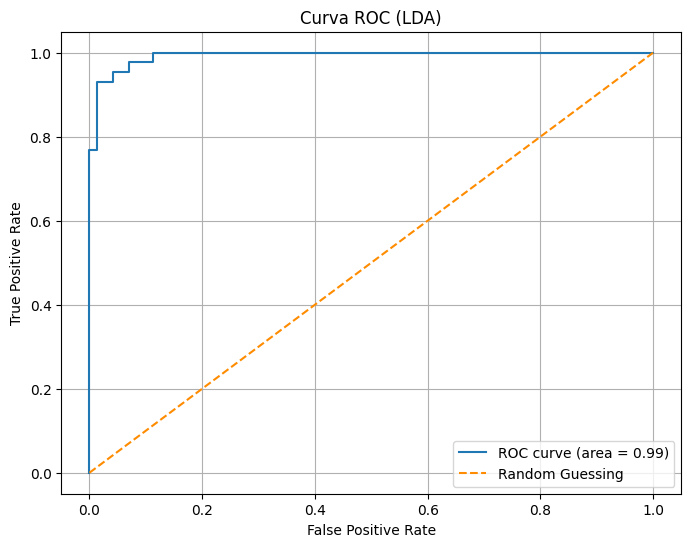

In [110]:
# Matriz de confusión
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print("\nMatriz de confusión (LDA):")
print(conf_matrix_lda)

# Reporte de clasificación
print("\nReporte de clasificación (LDA):")
print(classification_report(y_test, y_pred_lda))

# Exactitud del modelo
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"\nExactitud del modelo (LDA): {accuracy_lda * 100:.2f}%")

# ROC-AUC
y_pred_proba_lda = classifier_lda.predict_proba(X_test_lda)[:, 1]
roc_auc_lda = roc_auc_score(y_test, y_pred_proba_lda)

# Curva ROC para LDA
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, y_pred_proba_lda)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, label=f'ROC curve (area = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='darkorange', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (LDA)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

> + Reducción con LDA:
LDA busca maximizar la separación entre clases utilizando componentes discriminantes. Reducimos las dimensiones a 1 para facilitar la visualización.
Transformamos los conjuntos de entrenamiento y prueba.

> + Clasificación con LDA:
Entrenamos un modelo de regresión logística con las dimensiones reducidas de LDA.
Evaluamos el modelo utilizando las mismas métricas que en PCA.

> + Curva ROC:
Generamos y graficamos la curva ROC para analizar el rendimiento de LDA como técnica de reducción dimensional.